### **Final Project (Artificial Intelligence)**

### **Main objective of the project**
Given a data set of song characteristics, **is it possible to classify a song as 'Hip-Hop' or 'Rock' without listening to it?**

#### **#1 Importing and data load**

**#1.1 Import Libraries:**

In [1]:
### Importing Libraries

import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [ ]:
### Importing for Google Colab 
from google.colab import drive
drive.mount('/content/drive')

**#1.2 Data load:**

In [2]:
#### Reading files
data_csv = pd.read_csv('./data/fma-rock-vs-hiphop.csv')
data_json = pd.read_json('./data/echonest-metrics.json')

In [ ]:
## Reading files from drive
data_csv = pd.read_csv('/content/drive/MyDrive/IA1_2023-2_Proyecto Final-Primera_Entrega/ClassifyMusicGenres/data/fma-rock-vs-hiphop.csv')
data_json = pd.read_json('/content/drive/MyDrive/IA1_2023-2_Proyecto Final-Primera_Entrega/ClassifyMusicGenres/data/echonest-metrics.json')

#### **#2 Exploring initial data**

**#2.1 Exploring original dimensions**

In [3]:
#### Show original dimensions
print(data_csv.shape)
print(data_json.shape)

(17734, 21)
(13129, 9)


**#2.2 Reviewing heads**

In [9]:
#### CSV Data head
data_csv.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [10]:
#### JSON Data head
data_json.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


**#2.3 Showing datasets info**

In [13]:
#### CSV general info
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [14]:
#### JSON general info
data_json.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


**#2.4 Descriptive statics**

This provides summary statistics for the numeric columns

In [15]:
#### CSV descriptive statics
data_csv.describe()

,track_id,bit_rate,comments,duration,favorites,interest,listens,number
count,17734.000000,17734.000000,17734.000000,17734.000000,17734.000000,1.773400e+04,17734.000000,17734.000000
mean,69394.145991,258971.413781,0.020695,220.942934,1.685237,1.678238e+03,1079.709541,6.184110
std,45784.589753,61535.621463,0.270070,177.906821,6.629402,9.394969e+03,4693.497635,7.075062
min,2.000000,-1.000000,0.000000,2.000000,0.000000,1.800000e+01,9.000000,0.000000
25%,29979.000000,220982.000000,0.000000,139.000000,0.000000,4.210000e+02,214.000000,2.000000
50%,64193.500000,256000.000000,0.000000,192.000000,1.000000,8.240000e+02,461.000000,5.000000
75%,109442.750000,320000.000000,0.000000,255.000000,2.000000,1.628000e+03,1018.000000,8.000000
max,155319.000000,448000.000000,24.000000,3675.000000,554.000000,1.038669e+06,433992.000000,100.000000


In [16]:
#### JSON descriptive statics
data_json.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,13129.000000,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,34031.058268,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761
std,28950.422182,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028
min,2.000000,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010
25%,12986.000000,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321
50%,28097.000000,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743
75%,45021.000000,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575
max,124911.000000,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990


#### **#3 Do a merge**

It is observed that the variable `track_id` is common to both tables, so we join the tables to continue analyzing one table.

In [18]:
#### Do a merge between data frames
merged_data = pd.merge(data_csv, data_json, on='track_id', how='inner')

We use the parameter how='inner', which means that only the rows where track_id exists in both data frames are needed.

#### **#4 Exploring data**

In [19]:
#### Merged Dataframe dimensions
merged_data.shape

(4802, 29)

It is observed that we were left with 29 columns and a large part of the data was lost when merging

In [20]:
#### Dataframe Columns
merged_data.columns

Index(['track_id', 'bit_rate', 'comments', 'composer', 'date_created',
       'date_recorded', 'duration', 'favorites', 'genre_top', 'genres',
       'genres_all', 'information', 'interest', 'language_code', 'license',
       'listens', 'lyricist', 'number', 'publisher', 'tags', 'title',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'valence'],
      dtype='object')

In [21]:
#### Dataframe info
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   bit_rate          4802 non-null   int64  
 2   comments          4802 non-null   int64  
 3   composer          106 non-null    object 
 4   date_created      4802 non-null   object 
 5   date_recorded     1234 non-null   object 
 6   duration          4802 non-null   int64  
 7   favorites         4802 non-null   int64  
 8   genre_top         4802 non-null   object 
 9   genres            4802 non-null   object 
 10  genres_all        4802 non-null   object 
 11  information       334 non-null    object 
 12  interest          4802 non-null   int64  
 13  language_code     2599 non-null   object 
 14  license           4789 non-null   object 
 15  listens           4802 non-null   int64  
 16  lyricist          13 non-null     object 


In [23]:
#### Merged data head
merged_data.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,tags,title,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,[],Hundred-Year Flood,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,256000,0,Arc and Sender,2008-11-26 01:45:04,2008-11-26 00:00:00,319,1,Rock,[26],...,[],Squares And Circles,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,192000,0,NaN,2008-11-26 01:45:10,2008-11-26 00:00:00,756,1,Rock,[26],...,[],Maps of the Stars Homes,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,192000,0,James Squeaky,2008-11-26 01:46:02,2006-01-01 00:00:00,144,1,Rock,[25],...,[],Boss of Goth,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,192000,0,NaN,2008-11-26 01:46:05,2006-10-07 00:00:00,181,0,Rock,[25],...,[],Industry Standard Massacre,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


In [22]:
#### Null values in each column
merged_data.isnull().sum()

track_id               0
bit_rate               0
comments               0
composer            4696
date_created           0
date_recorded       3568
duration               0
favorites              0
genre_top              0
genres                 0
genres_all             0
information         4468
interest               0
language_code       2203
license               13
listens                0
lyricist            4789
number                 0
publisher           4775
tags                   0
title                  0
acousticness           0
danceability           0
energy                 0
instrumentalness       0
liveness               0
speechiness            0
tempo                  0
valence                0
dtype: int64

We found that there are columns with too many null values.

#### **#5 Detailed Analysis**

##### **#5.1 Defining each column**

**Track id:** Unique Identifier of the music track. <br><br>
**Bit rate:** Amount of digital information to represent the sound in a musical track. The larger the amount, the better the sound is represented. <br><br>
**Comments:** Number of comments each track has received. <br><br>
**Composer:** Composer of the track. <br><br>
**Date created:** Track creation date. <br><br>
**Date recorded:** The date the track was recorded. <br><br>
**Duration:** Track duration in seconds. <br><br>
**Favorites:** The number of times the track was selected as a favorite. <br><br>
**Genre top:** The main genre of the music track. <br><br>
**Genres:** Genres associated with a track. <br><br>
**Genres all:** All genres associated with a track. <br><br>
**Information:** Track information. <br><br>
**Interest:** Number of times the track was of interest. <br><br>
**Language code:** Representation of the language in the code. <br><br>
**License:** The license under which the music is distributed. <br><br>
**Listens:** The number of times the track has been listened to. <br><br>
**Lyricist:** The lyricist of the track. <br><br>
**Number:** The track number of an album or collection. <br><br>
**Publisher:** The track publisher. <br><br>
**Tags:** Tags or keywords associated with a track. <br><br>
**Title:** Track title. <br><br>
**Acousticness:** A measure of track acoustics. <br><br>
**Danceability:** A measure of track danceability. <br><br>
**Energy:** A measure of track energy. <br><br>
**Instrumentalness:** A measure of how much the track is instrumental. <br><br>
**Liveness:** A measure of the audience's presence at the recording. <br><br>
**Speechiness:** A measure of the presence of spoken words in the musical track. <br><br>
**Tempo:** The tempo or speed of the track. <br><br>
**Valence:** A measure of the positivity of the musical track. <br><br>


##### **#5.2 Exploring Null data**

##### **Missing Values Analysis**

##### **No Missing Values**:
- **track_id, bit_rate, comments, date_created, duration, favorites, genre_top, genres, genres_all, interest, listens, number, tags, title, acousticness, danceability, energy, instrumentalness, liveness, speechiness, tempo, and valence**:
    - These columns have **no missing values** and are completely filled.

##### **Significant Missing Values**:

1. **composer**:
    - 4696 missing values out of 4802 (approximately 97.8% of the data is missing).
    - **Recommendation**: Due to the high number of missing values, this column may not be useful for analysis and classification.

2. **date_recorded**:
    - 3568 missing values out of 4802 (approximately 74.3%).
    - **Recommendation**: This column could be omitted unless the recording date is considered to have a significant influence on the song's genre.

3. **information**:
    - 4468 missing values out of 4802 (approximately 93.0%).
    - **Recommendation**: It is likely not useful due to the lack of data.

4. **language_code**:
    - 2203 missing values out of 4802 (approximately 45.9%).
    - **Recommendation**: This column could be useful if certain genres tend to be in certain languages. However, it should be treated with caution due to the number of missing values.

5. **license**:
    - 13 missing values out of 4802 (less than 0.3%).
    - **Recommendation**: The missing values could be filled or removed, but a better understanding is needed to determine if the license is relevant to genre classification.

6. **lyricist**:
    - 4789 missing values out of 4802 (approximately 99.7%).
    - **Recommendation**: Due to the extremely high percentage of missing values, it is likely not useful.

7. **publisher**:
    - 4775 missing values out of 4802 (approximately 99.4%).
    - **Recommendation**: Similar to 'lyricist,' it is likely not useful.


##### **#5.3 Exploring values in dataset**

In [32]:
#### Print the values of each column
for c in merged_data.columns:
    print(c + " column")
    print()
    print(merged_data[c])
    print()


track_id column

0          153
1          154
2          155
3          169
4          170
         ...  
4797    124718
4798    124719
4799    124720
4800    124721
4801    124722
Name: track_id, Length: 4802, dtype: int64

bit_rate column

0       256000
1       256000
2       192000
3       192000
4       192000
         ...  
4797    224206
4798    217951
4799    199442
4800    235940
4801    192418
Name: bit_rate, Length: 4802, dtype: int64

comments column

0       0
1       0
2       0
3       0
4       0
       ..
4797    0
4798    0
4799    0
4800    0
4801    0
Name: comments, Length: 4802, dtype: int64

composer column

0       Arc and Sender
1       Arc and Sender
2                  NaN
3        James Squeaky
4                  NaN
             ...      
4797               NaN
4798               NaN
4799               NaN
4800               NaN
4801               NaN
Name: composer, Length: 4802, dtype: object

date_created column

0       2008-11-26 01:45:00
1       2008-

#### **#5.4 Exploring target variable** (`genre_top`)

In [33]:
merged_data['genre_top'].value_counts()

genre_top
Rock       3892
Hip-Hop     910
Name: count, dtype: int64

**It is observed that there is an imbalance between the objective data**

#### **#6 Relevant columns for the analysis**

Below, we list the columns considered relevant for our goal of classifying a song as 'Hip-Hop' or 'Rock' based on its intrinsic characteristics:

1. **duration**: Represents the track's duration. Duration may exhibit specific patterns for certain genres.
2. **genre_top**: This is our target variable. It indicates the main genre of the song.
3. **acousticness**: Measures how acoustic a track is. Some genres may tend to be more acoustic than others.
4. **danceability**: Indicates how suitable a track is for dancing. Different genres have distinct rhythmic characteristics.
5. **energy**: Reflects the energy of a track. It can help distinguish between more energetic genres and softer ones.
6. **instrumentalness**: Determines how instrumental a song is. Some genres may have more instrumentals than others.
7. **liveness**: Detects the presence of an audience in the recording of the track. It can differentiate between live and studio recordings.
8. **speechiness**: Indicates the presence of spoken words in a track. It is crucial for genres like hip-hop.
9. **tempo**: Refers to the tempo of the track. Different genres can have characteristic tempos.
10. **valence**: Measures how positive the music is. It can help differentiate the emotional tone between genres.

##### **Reasons for Discarding Other Columns**

Various columns were opted to be discarded for several reasons:

- **Identifiers and metadata** such as `track_id`, `composer`, `date_created`, `date_recorded`, `lyricist`, `publisher`, `tags`, and `title` do not offer relevant information about the intrinsic musical genre.
  
- **Indicators of popularity** such as `comments`, `favorites`, `interest`, and `listens` reflect public reception but not the essence of the genre.

- **License and technical quality** represented in `license` and `bit_rate` are not directly related to the sonic characteristics of the genre.

- The possibility of **data leakage** is avoided by discarding `genres` and `genres_all` since `genre_top` already serves as the target variable.

The main idea is to focus on characteristics that reflect the nature and essence of the musical genre, rather than popularity, metadata, or technical aspects.


#### **#7 Data Cleaning**

In [38]:
# Discarding unwanted columns
cols_to_drop = ['track_id', 'bit_rate', 'comments', 'composer', 'date_created', 'date_recorded', 'favorites',
                'genres', 'genres_all', 'information', 'interest', 'language_code', 'license', 'listens',
                'lyricist', 'number', 'publisher', 'tags', 'title']
merged_data_clean = merged_data.drop(columns=cols_to_drop)

In [40]:
merged_data_clean.head()

,duration,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,405,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,319,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,756,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,144,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,181,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


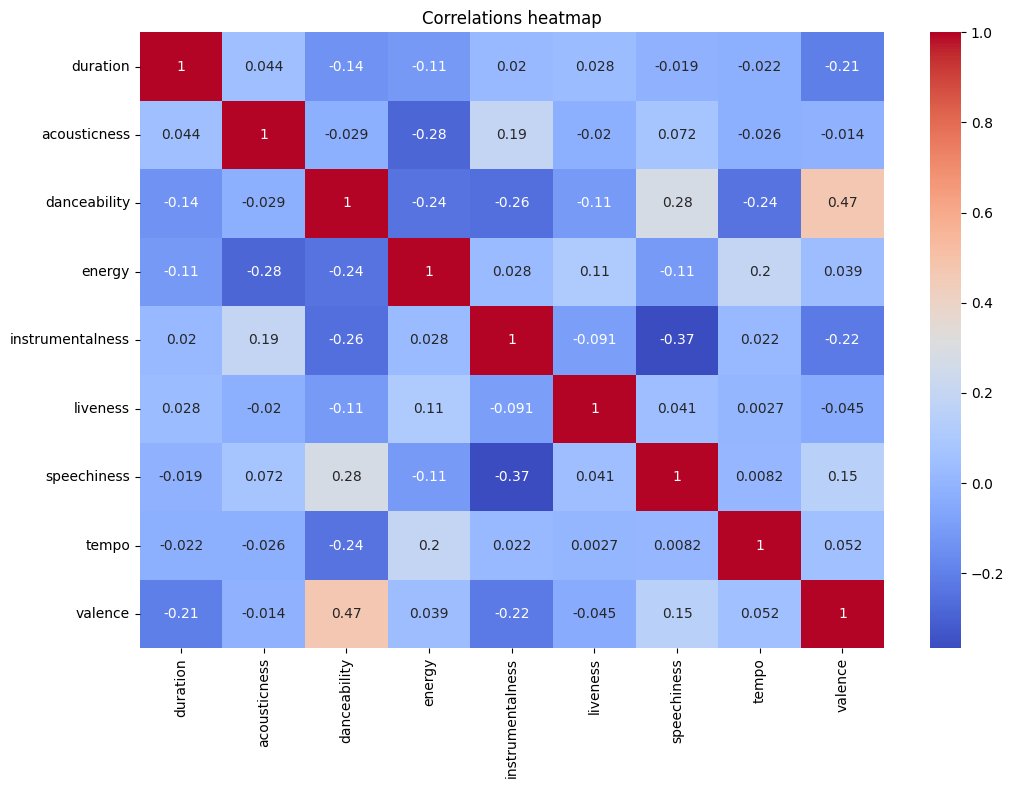

In [41]:
# Exploratory analysis and visualization.
# Correlations heatmap
numeric_data = merged_data_clean.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), cmap="coolwarm", annot=True)
plt.title("Correlations heatmap")
plt.show()


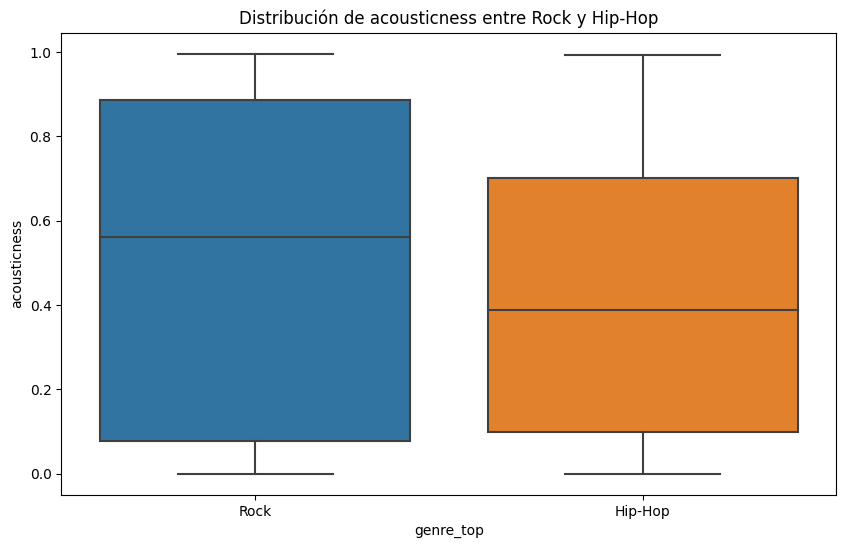

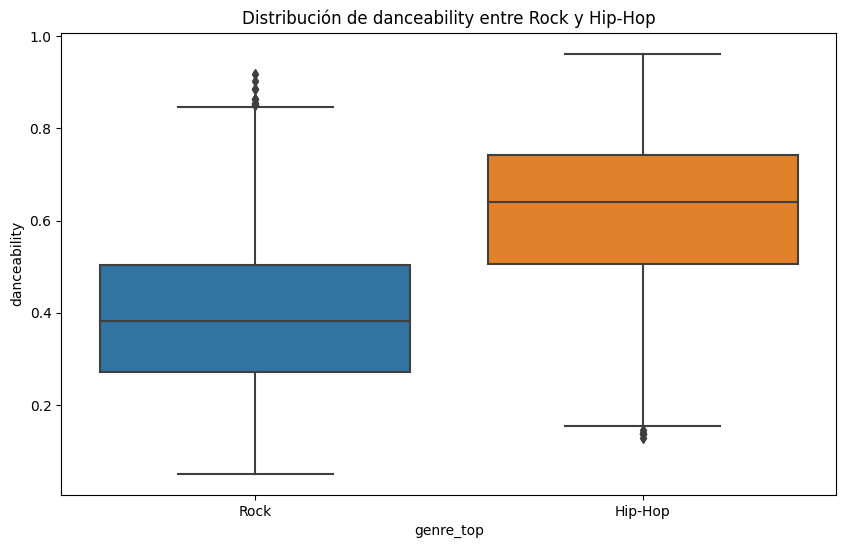

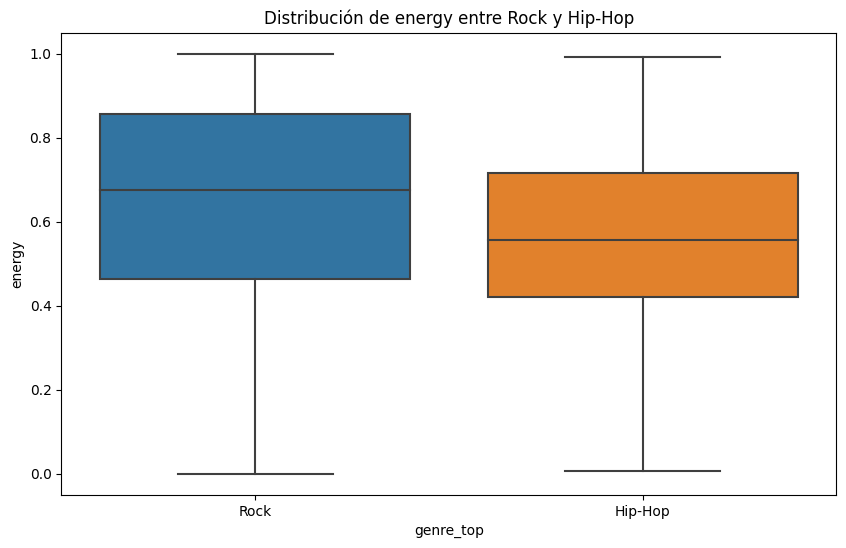

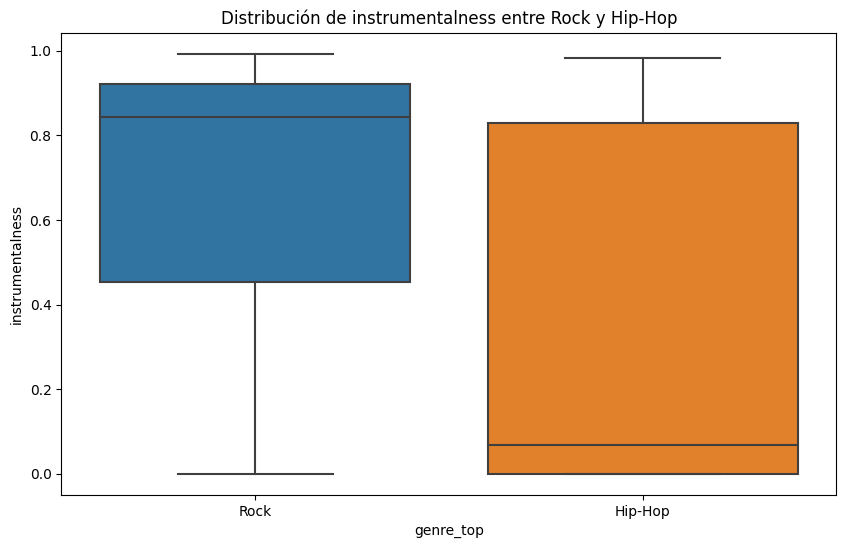

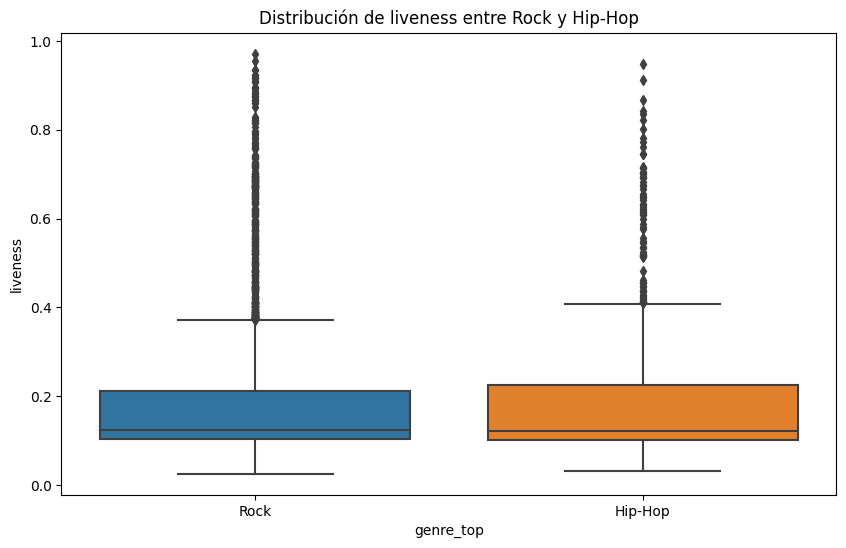

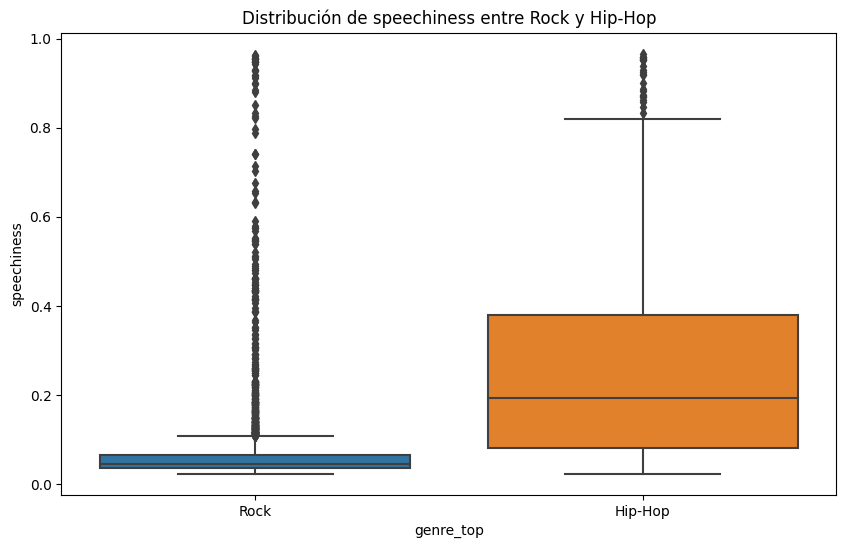

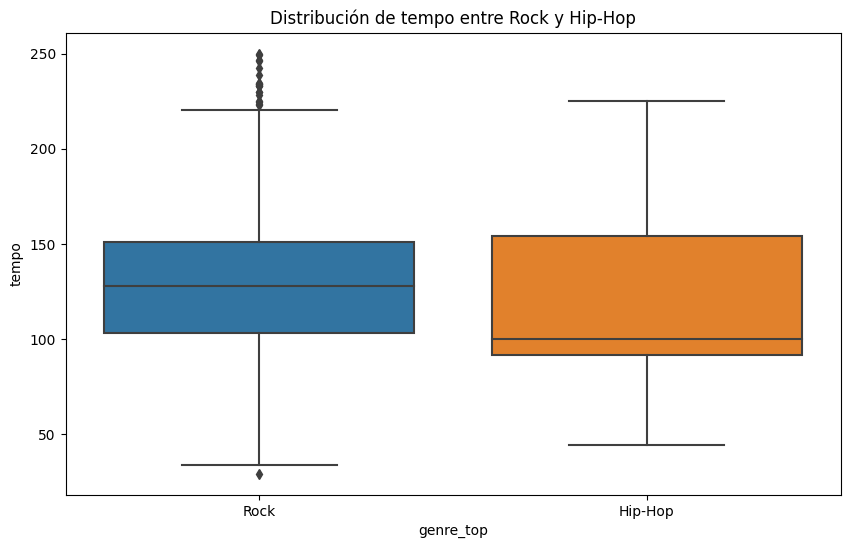

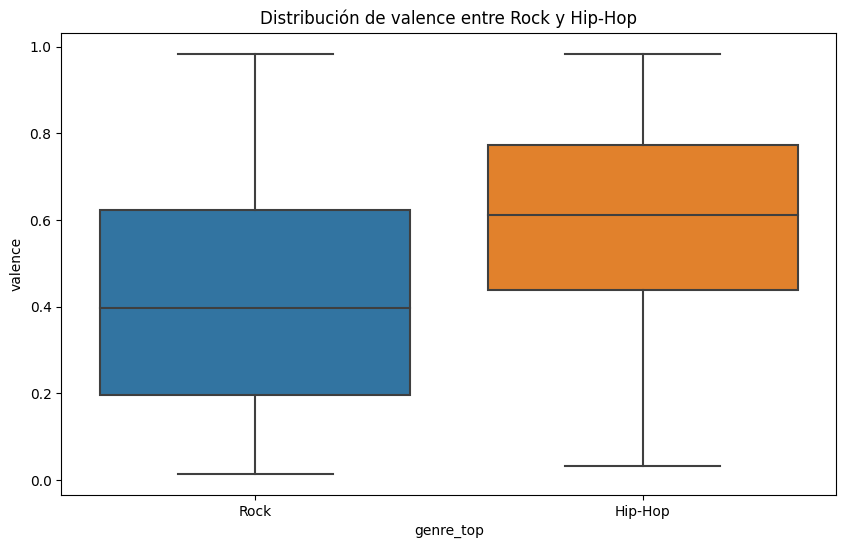

In [42]:
# Boxplots to compare feature distributions between Rock and Hip-Hop

features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='genre_top', y=feature, data=merged_data_clean)
    plt.title(f"Distribución de {feature} entre Rock y Hip-Hop")
    plt.show()

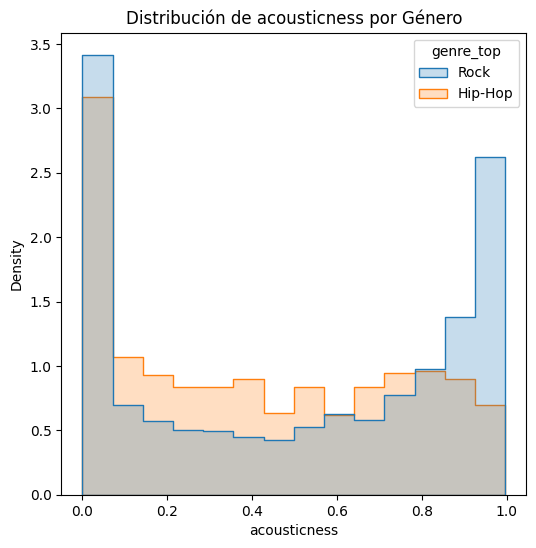

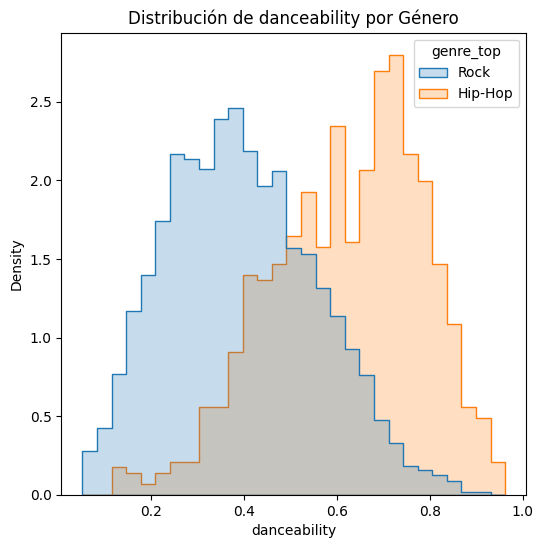

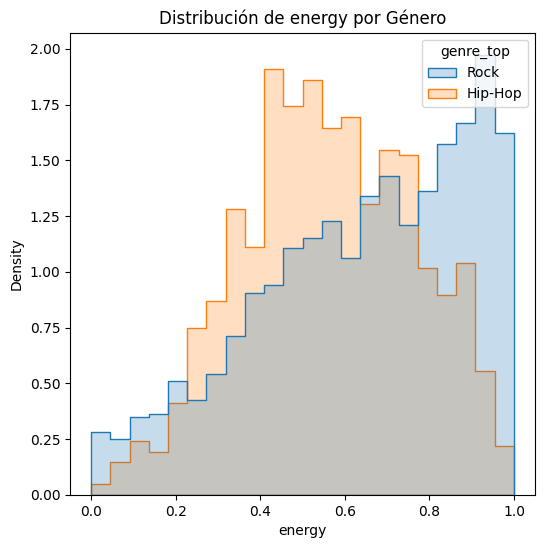

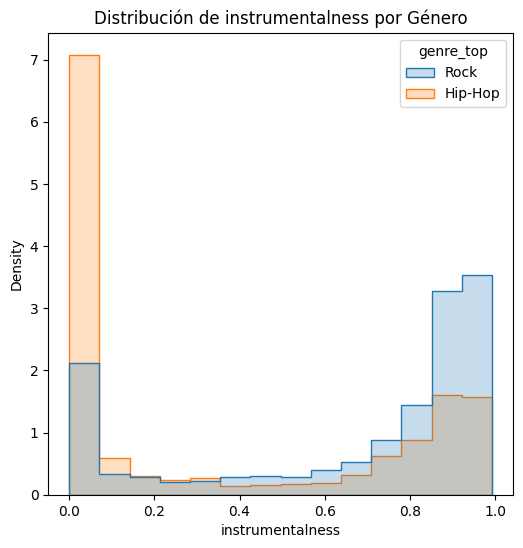

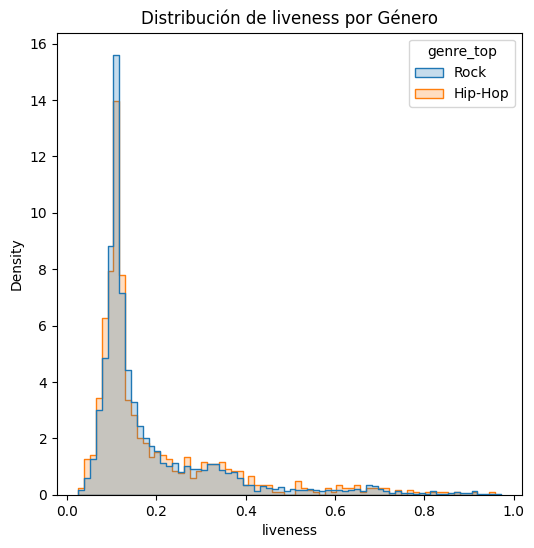

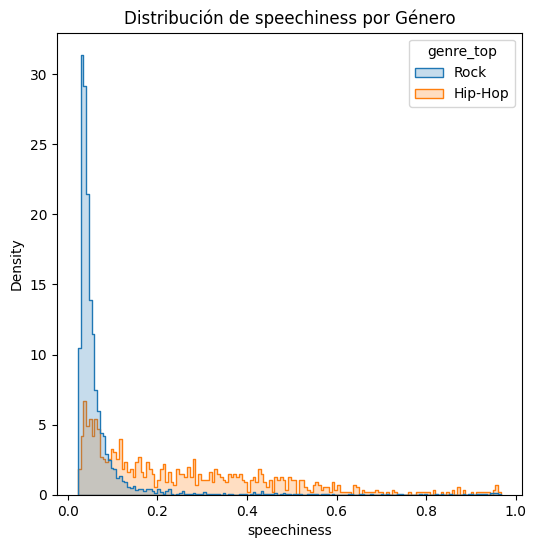

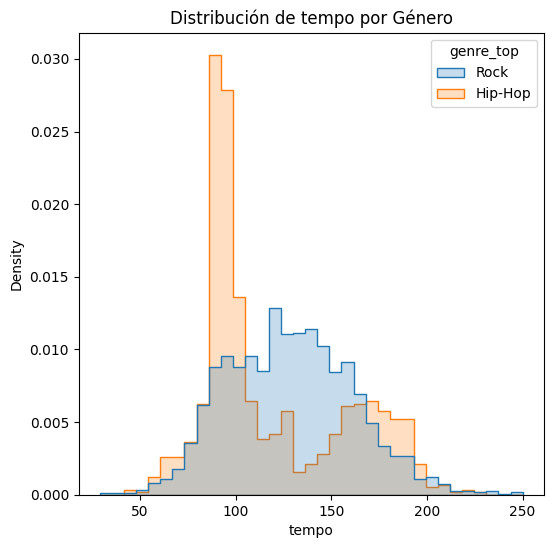

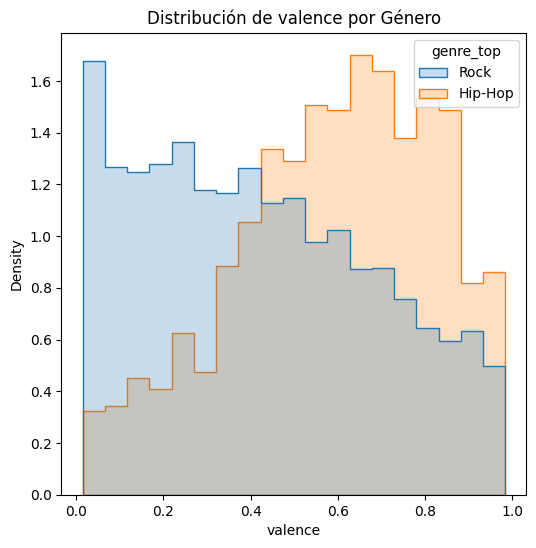

In [43]:
# Histograms or KDE for each feature by genre

for feature in features:
    plt.figure(figsize=(6, 6))
    sns.histplot(merged_data_clean, x=feature, hue='genre_top', element="step", stat="density", common_norm=False)
    plt.title(f"Distribución de {feature} por Género")
    plt.show()